# Prepação e transformação dos dados

In [1]:
import pandas as pd
import numpy as np

# visualizacao
import matplotlib.pyplot as plt
from seaborn import heatmap

# base com modelos lineares
import statsmodels.api as sm

# modelo não linear (florestas aleatorias)
from sklearn.tree import DecisionTreeRegressor

# floresta aleatoria
from sklearn.ensemble import RandomForestRegressor

# gerar uma grade (dicionario) para ajuste de hiperparametros
from sklearn.model_selection import ParameterGrid

# XGB para regressão
from sklearn.ensemble import GradientBoostingRegressor

# normalização dos dados
from sklearn.preprocessing import scale

# KNN (vizinhos próximos)
from sklearn.neighbors import KNeighborsRegressor

# montar rede neural artifical
from keras.models import Sequential
from keras.layers import Dense

# calcular R^2 (avaliar precisão regressão) no sklearn
from sklearn.metrics import r2_score

# funções para montar uma função de custo no keras
import keras.losses
import tensorflow as tf

# regularização da rede neural no keras
from keras.layers import Dropout

# indicadores economicos
# instalando ta, mais informação no git https://github.com/bukosabino/ta
#!pip install ta
import ta

Using TensorFlow backend.


In [2]:
# lendo os dados da vale
valeDf = pd.read_csv('vale.csv')

In [3]:
valeDf.head()

,data,open,high,low,close,volume,adjusted,quart,quint,seg,sext,terc
0,2017-01-02,25.280001,25.49,25.049999,25.059999,1118500,22.465153,0,0,1,0,0
1,2017-01-03,25.510000,26.17,25.400000,26.170000,5658500,23.460220,0,0,0,0,1
2,2017-01-04,26.059999,26.23,25.360001,25.700001,2144400,23.038883,1,0,0,0,0
3,2017-01-05,25.980000,26.90,25.780001,26.680000,4031600,23.917410,0,1,0,0,0
4,2017-01-06,26.290001,26.59,25.860001,25.969999,4213500,23.280928,0,0,0,1,0


In [4]:
valeDf.describe()

,open,high,low,close,volume,adjusted,quart,quint,seg,sext,terc
count,746.000000,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,43.379236,43.913847,42.797172,43.351059,1.628145e+07,41.360043,0.201072,0.205094,0.199732,0.197051,0.197051
std,9.589165,9.649934,9.480502,9.567145,1.087260e+07,9.981466,0.401071,0.404041,0.400067,0.398038,0.398038
min,25.000000,25.490000,25.000000,25.059999,0.000000e+00,22.465153,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.365001,33.845000,32.822501,33.312501,1.019788e+07,30.495821,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.649999,47.094999,46.030000,46.594999,1.532385e+07,45.151373,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.142501,51.735002,50.452499,51.085000,2.097925e+07,49.532479,0.000000,0.000000,0.000000,0.000000,0.000000
max,62.200001,62.419998,60.480000,62.200001,1.835345e+08,60.594360,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
valeDf.columns

Index(['data', 'open', 'high', 'low', 'close', 'volume', 'adjusted', 'quart',
       'quint', 'seg', 'sext', 'terc'],
      dtype='object')

## Indicadores

Inicadores não novas variáveis criadas em cima dos dados do mercado (abertura, fechamento, volume...) para indicar a movimentação do ativo (vai subir ou cair). Seguem alguns deles.

**Média móvel:** é uma média realizada em um intervalo da série.

**IFR (índice de força relativa) = RSI:** é um índice que mede a força de reversão do mercado e também é aplicado em perídos

In [6]:
# faltam adicionar os indicadores de média móveis simples e exponêncial (para diferentes janelas 7, 15, 30, 90, 200 dias)
# não está presente no pacote ta

# https://finquant.readthedocs.io/en/latest/movingaverage.html

In [7]:
# obtendo todos indicadores (74) do pacote 
# ou posso cria-los separadamente como " ta.momentum.RSIIndicator() ""
df = ta.add_all_ta_features(
    valeDf, open="open", high="high", low="low", close="close", volume="volume")

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ta\trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ta\trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [8]:
df.columns

Index(['data', 'open', 'high', 'low', 'close', 'volume', 'adjusted', 'quart',
       'quint', 'seg', 'sext', 'terc', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'momentum_mfi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_nvi', 'volatility_atr', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dchi', 'volatility_dcli', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_ema_fast',
       'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'tre

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       746 non-null    object 
 1   open                       746 non-null    float64
 2   high                       746 non-null    float64
 3   low                        746 non-null    float64
 4   close                      746 non-null    float64
 5   volume                     746 non-null    int64  
 6   adjusted                   746 non-null    float64
 7   quart                      746 non-null    int64  
 8   quint                      746 non-null    int64  
 9   seg                        746 non-null    int64  
 10  sext                       746 non-null    int64  
 11  terc                       746 non-null    int64  
 12  volume_adi                 746 non-null    float64
 13  volume_obv                 746 non-null    int64  

In [10]:
df.tail(20)

,data,open,high,low,close,volume,adjusted,quart,quint,seg,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
726,2019-11-29,50.369999,50.470001,49.820000,49.980000,10290800,48.689808,0,0,0,...,62.699684,66.519831,73.788559,-33.480169,2.115118,48.981837,3.843754,-0.774268,-0.777281,99.441349
727,2019-12-02,50.150002,51.689999,50.110001,51.340000,23952200,50.014702,0,0,1,...,63.815989,92.600444,78.076797,-7.399556,2.062353,49.454502,7.181624,2.721088,2.684725,104.868324
728,2019-12-03,51.250000,51.259998,50.250000,50.419998,13479700,49.118446,0,0,0,...,55.975520,73.150085,77.423453,-26.849915,1.933529,49.542460,7.003394,-1.791979,-1.808229,101.197127
729,2019-12-04,50.830002,51.029999,50.529999,50.919998,9105800,49.605541,1,0,0,...,56.962358,83.720909,83.157146,-16.279091,1.872117,49.665393,8.340421,0.991670,0.986785,103.192339
730,2019-12-05,50.700001,51.080002,50.549999,50.950001,9503500,49.634769,0,1,0,...,57.736295,84.355222,80.408739,-15.644778,1.868264,49.771143,7.015333,0.058922,0.058904,103.312063
731,2019-12-06,51.250000,51.689999,51.029999,51.349998,13892600,50.024441,0,0,0,...,59.154519,91.923965,86.666699,-8.076035,1.978029,49.837783,6.601620,0.785078,0.782012,104.908220
732,2019-12-09,52.250000,52.490002,51.330002,51.439999,19388300,50.112118,0,0,1,...,52.810788,78.079274,84.786154,-21.920726,2.023853,49.867326,6.237094,0.175270,0.175116,105.267363
733,2019-12-10,51.220001,51.430000,50.900002,51.200001,13878600,49.878315,0,0,0,...,54.346478,73.068878,81.024039,-26.931122,1.975559,49.873315,2.338601,-0.466559,-0.467651,104.309669
734,2019-12-11,51.380001,52.049999,51.220001,51.830002,15572100,50.492054,1,0,0,...,50.860578,83.248744,78.132299,-16.751256,2.019647,49.970020,1.907198,1.230471,1.222962,106.823640
735,2019-12-12,52.099998,53.060001,51.730000,52.950001,25140900,51.583141,0,1,0,...,60.279454,96.735907,84.351176,-3.264093,2.189618,50.310522,3.377587,2.160909,2.137892,111.292909


In [11]:
dimAntes = df.shape

# removendo missings
df = df.dropna()

dimDps = df.shape

print("Dimensoes:\n Antes: ", dimAntes, " ___ Depois: ", dimDps)

Dimensoes:
 Antes:  (746, 82)  ___ Depois:  (0, 82)


In [12]:
indicDf = ta.add_all_ta_features(
    valeDf, open="open", high="high", low="low", close="close", volume="volume")


# adicionando as bandas de Bollinger
indicator_bb = ta.volatility.BollingerBands(close=indicDf["close"], n=20, ndev=2)

# Add Bollinger Bands features
indicDf['bb_bbm'] = indicator_bb.bollinger_mavg()
indicDf['bb_bbh'] = indicator_bb.bollinger_hband()
indicDf['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
indicDf['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
indicDf['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

# Add width size Bollinger Bands
indicDf['bb_bbw'] = indicator_bb.bollinger_wband()

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ta\trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ta\trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [13]:
# removendo linhas e colunas com muitos NAs 
# df = df.dropna() não é útul pois existe NA em todas linhas
indicDf = indicDf.loc[200:700].drop(['volume_em', 'trend_psar_up', 'trend_psar_down'], axis=1)

# visualizando a correlação dos indicadores
correlacao = indicDf.corr()

AxesSubplot(0.125,0.125;0.62x0.755)


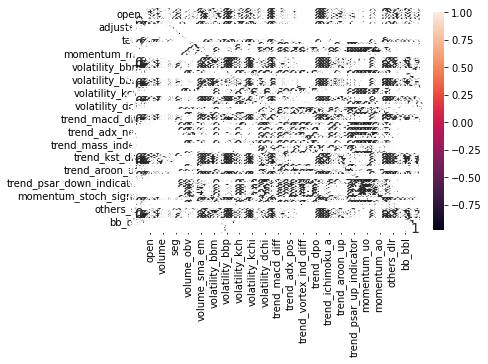

In [14]:
# olhando correlação entre variaveis e indicadores
print(heatmap(correlacao, annot=True, annot_kws = {"size": 14}))

## Treinando um modelo linear simples

Antes de se iniciar a modelagem preditiva é necessário estabelecer um *baseline*, um modelo base inicial para se comparar com os próximos modelos. Uma boa premissa para isso em séries temporais é supor que o próximo dia será igual ao anterior, então se dá início aos próximos modelos para serem comparados com essa estimativa inicial. 

Usando todos os indicadores e as demais variávies pra prever o fechamento.

Vamos treinar um modelo linear simples e usar o **p-valor** como métrica de avaliação.

Se p-valor for menor 0.05 então a variável é estatisticamente significante para explicar esse modelo.



In [15]:
# selecionando variável alvo
targets = indicDf.loc[:, indicDf.columns == 'close']

# adicionando uma constante para as variaveis
varsLinDf = sm.add_constant(indicDf.drop(['close','data'], axis=1))

# separando conjunto de teste e treino
train_size = int(0.85 * varsLinDf.shape[0])
train_features = varsLinDf[:train_size]
train_targets = targets[:train_size]
test_features = varsLinDf[train_size:]
test_targets = targets[train_size:]

# dimensoes dos conjuntos de treino e teste
print(varsLinDf.shape, train_features.shape, test_features.shape)

(501, 84) (425, 84) (76, 84)


In [16]:
# Create the linear model and complete the least squares fit
model = sm.OLS(np.asarray(train_targets), np.asarray(train_features))
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(np.asarray(train_features))
test_predictions = results.predict(np.asarray(test_features))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.191e+18
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:41:07   Log-Likelihood:                 7213.7
No. Observations:                 425   AIC:                        -1.429e+04
Df Residuals:                     356   BIC:                        -1.401e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050   3.72e-11   1.35e+08      0.0

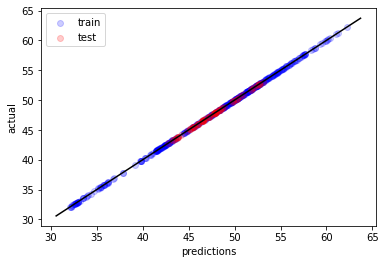

In [17]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

No gráfico acima, quanto mais em cima da reta diagonal os pontos estiverem, maior a precisão do modelo

## Engenharia de Feature

Uma feature importante a ser adicionada para modelos não lineares são os dias da semana.

Eles podem apresentar um padrão não reconhecido pelos modelos lineares.

## Modelo não linear: random forest

Testanto um modelo não linear para obter melhor desempenho que o linear.

O modelo de florestas aleatórias (random forest) possui alguns hiperparâmetros para ser configurados. Um deles é a profundidade das árvores de decisão. Profundidade muito grande pode gerar ovefitting, quando o modelo decora os dados de treino e apresenta baixo desempenho nos dados de teste.

A métrica de avaliação é o R^2 (erro médio quadrático) que varia de 0 a 1. Quanto mais próximo de 1, mais o modelo consegue explicar os dados. 

In [18]:
# criando o modelo de regressão da árvore de decisão
decision_tree = DecisionTreeRegressor()

# treinando o modelo
decision_tree.fit(train_features, train_targets)

# checando a precisão
# SCORE retorna o R^2 (coeficiente de determinação/avaliação)
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

1.0
0.9927134918741308


In [19]:
# deletando modelo existente
del decision_tree

# laço para testar diferentes profundidades máximas das árvores e testa-las
for d in [3, 5, 10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')
    
    del decision_tree

max_depth= 3
0.9776288975425383
0.8327551563965692 

max_depth= 5
0.9986811985673081
0.980873920384411 

max_depth= 10
0.99999993404824
0.9948040953565752 



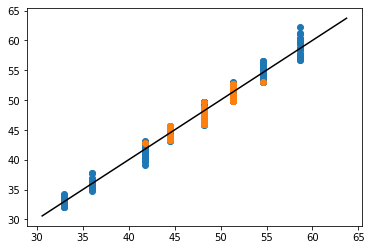

In [20]:
# profundidade 3 das árvores
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# predição para os valores de treino e teste
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# grafico de pontos entre Real Vs. Predito
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.show()

In [21]:
# treinando uma floresta aleatória (random forest)
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9999266715926732
0.9984429086824617


In [22]:
# ajustando hiperparâmetros do random forest
# random state é para sempre deixar o modelo reprodutível (plantar semente)
# GridSearchCV para procurar hiperparametros mas agora não será usada validação cruzada
# ParameterGrid cria uma grade (dicionario) de combinação de hiperparametros

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    
    del rfr
    
    rfr = RandomForestRegressor()
    rfr.set_params(**g)  # ** está descompactando/abrindo o dicionario
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])


c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7191517378981032 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


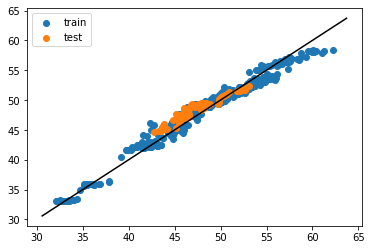

In [23]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=8, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend()
plt.show()

## Importância de variáveis (feature importance)

Muito importante de ser realizada antes do treino dos modelos pois elimina variáveis inúteis para predição.

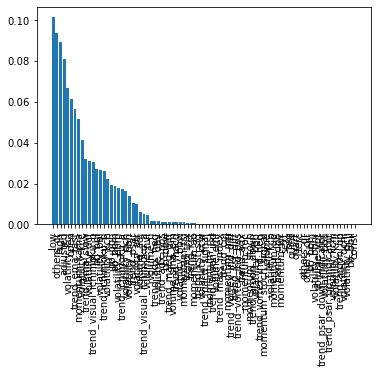

In [24]:
# nomes variaveis explicativas/preditivas
feature_names = varsLinDf.columns

# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [25]:
labels

array(['low', 'others_cr', 'high', 'adjusted', 'volatility_kcl', 'open',
       'trend_ema_fast', 'momentum_kama', 'volatility_kcc',
       'trend_ema_slow', 'volatility_dcl', 'trend_visual_ichimoku_b',
       'bb_bbl', 'volatility_bbl', 'trend_ichimoku_b', 'volatility_kch',
       'bb_bbh', 'bb_bbm', 'volatility_bbm', 'trend_ichimoku_a',
       'volatility_dch', 'volatility_bbh', 'trend_psar', 'volatility_atr',
       'volume_adi', 'trend_visual_ichimoku_a', 'volume_nvi', 'volume_fi',
       'trend_adx_neg', 'volume_obv', 'trend_adx_pos', 'bb_bbw',
       'trend_macd_diff', 'volume_sma_em', 'trend_macd', 'volatility_bbw',
       'momentum_tsi', 'trend_trix', 'trend_kst', 'momentum_ao',
       'trend_kst_sig', 'volatility_kcw', 'trend_macd_signal',
       'momentum_rsi', 'trend_aroon_ind', 'volume_cmf',
       'trend_mass_index', 'trend_cci', 'momentum_mfi',
       'trend_vortex_ind_diff', 'trend_kst_diff', 'trend_vortex_ind_pos',
       'trend_adx', 'momentum_roc', 'momentum_stoch', '

In [26]:
# criando GBM (floresta aleatória otimizada) com hiperparâmetros setados
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features, train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9634823220434875
0.8097219678471488


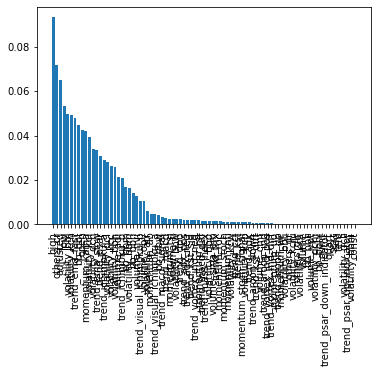

In [27]:
# features importance com GBM
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(varsLinDf.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

In [28]:
varsMenosImport50 = labels[-50:]

## Normalização dos dados

Modelos como KNN (vizinhos próximos) ou Redes Neurais funcionam melhor com dados normalizados/escalonados.

Depois da seleção de variáveis, removendo as de menor importância, deve-se fazer a normalização dos dados.

*scale()* do *sklearn*, por exemplo, faz normaliza os dados deixando ele com média 0 e desvio padrão 1.

c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


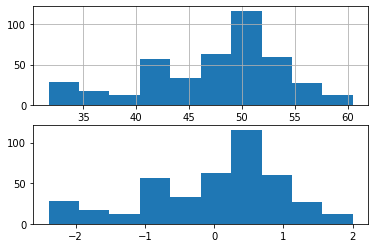

In [29]:
# removendo variaveis de menos importancia
train_features = train_features.drop(varsMenosImport50, axis=1)
test_features = test_features.drop(varsMenosImport50, axis=1)

# normalizacao
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# visalizando antes e depois da normalização
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [30]:
# KNN possui apenas um hiperparametro que é o NÚMERO DE VIZINHOS PRÓXIMOS
# iremos defini-lo

for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.9979840611856827
-1.0439887959085339

n_neighbors = 3
train, test scores
0.9963267733044494
-0.9912195907684146

n_neighbors = 4
train, test scores
0.9950120742990386
-0.917972395867747

n_neighbors = 5
train, test scores
0.992921864693236
-0.9235378762151183

n_neighbors = 6
train, test scores
0.9914909065180558
-0.9032936397040503

n_neighbors = 7
train, test scores
0.9901204559932413
-0.856208398566386

n_neighbors = 8
train, test scores
0.9890691174665982
-0.8298703749492375

n_neighbors = 9
train, test scores
0.9879856326237856
-0.777221231510913

n_neighbors = 10
train, test scores
0.9867555449878389
-0.7449563609119585

n_neighbors = 11
train, test scores
0.9859980814535139
-0.7245802645653157

n_neighbors = 12
train, test scores
0.9850216648427291
-0.7296890463826613



A métrica R^2 pode ser um valor negativo, basta tirar o modo dela. Quanto mais próximo de 1, mais o modelo explica os dados.

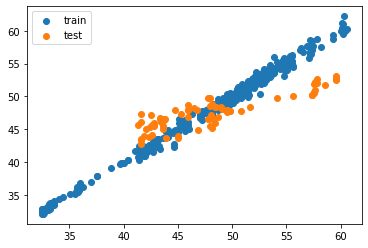

In [31]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

# Montando modelo complexo: rede neural

Montando uma rede neural "fully-conect", ou seja, todos neurônios entre camadas conectados entre sí.

In [32]:
# criando modelo da neural
model_1 = Sequential()
# vai ter 3 camadas: 
# entrada: 100 neuronios, função ativação Relu
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
# 1 escondida (20 neuronios), função ativação Relu
model_1.add(Dense(20, activation='relu'))
# camada de saída (regressão), função ativação Linear
model_1.add(Dense(1, activation='linear'))

# treinando modelo
# o custo será com R^2
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
425/425 [==============================] - 0s 388us/step - loss: 2318.9542
Epoch 2/25
425/425 [==============================] - 0s 26us/step - loss: 2177.5948
Epoch 3/25
425/425 [==============================] - 0s 53us/step - loss: 1959.3382
Epoch 4/25
425/425 [==============================] - 0s 38us/step - loss: 1648.4084
Epoch 5/25
425/425 [==============================] - 0s 48us/step - loss: 1266.9564
Epoch 6/25
425/425 [==============================] - 0s 46us/step - loss: 903.2456
Epoch 7/25
425/425 [==============================] - 0s 57us/step - loss: 616.9151
Epoch 8/25
425/425 [==============================] - 0s 74us/step - loss: 473.1379
Epoch 9/25
425/425 [==============================] - 0s 47us/step - loss: 435.4085
Epoch 10/25
425/425 [==============================] - 0s 67us/step - loss: 400.2147
Epoch 11/25
425/425 [==============================] - 0s 128us/step - loss: 363.1598
Epoch 12/25
425/425 [==============================] - 0s 84us/step

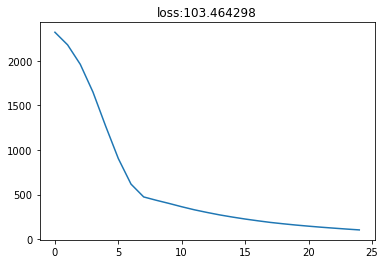

In [33]:
# plotando a função de custo
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-1.2042396101106112
-43.70581488252111


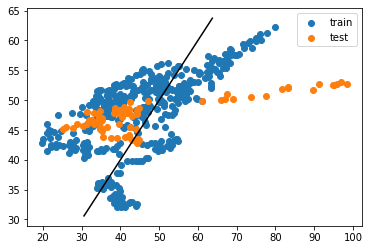

In [34]:
# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend()
plt.show()

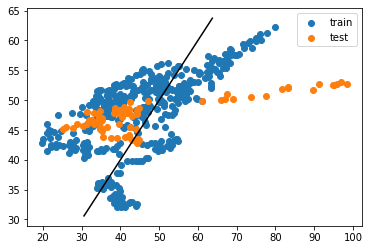

In [35]:
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend()
plt.show()

No modelo gerado acima não foi realizada **REGULARIZAÇÃO** na rede. 

A **REGULARIZAÇÃO** é importante para evitar overfitting, quando os modelos se saem muito bem no treino mas muito mal no teste.

Este processo consiste em adicionar um peso dentro da **função de custo impedindo** que essa chegue a **zerar**.

Pode ser feito Redes Neurais da seguinte forma:

* diminuir número de neurônios
* regularização L1/L2
* dropout
* autoencoder architecture
* cessar treinamento mais cedo
* adicionar ruído nos dados
* misturando modelos (ensembles)

In [36]:
# criando função de custo (opção personalizada)
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x000001C4173BA1F8>


Epoch 1/25
425/425 [==============================] - 0s 548us/step - loss: 51411.9027
Epoch 2/25
425/425 [==============================] - 0s 75us/step - loss: 2227.2049
Epoch 3/25
425/425 [==============================] - 0s 76us/step - loss: 2197.1848
Epoch 4/25
425/425 [==============================] - 0s 79us/step - loss: 2168.2552
Epoch 5/25
425/425 [==============================] - 0s 79us/step - loss: 2133.3380
Epoch 6/25
425/425 [==============================] - 0s 88us/step - loss: 2090.9433
Epoch 7/25
425/425 [==============================] - 0s 81us/step - loss: 2037.9959
Epoch 8/25
425/425 [==============================] - 0s 90us/step - loss: 1972.3916
Epoch 9/25
425/425 [==============================] - 0s 69us/step - loss: 1888.3852
Epoch 10/25
425/425 [==============================] - 0s 95us/step - loss: 1780.8642
Epoch 11/25
425/425 [==============================] - 0s 96us/step - loss: 1647.3425
Epoch 12/25
425/425 [==============================] - 0s 89u

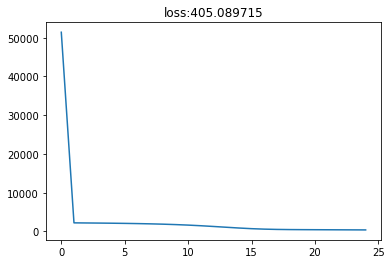

In [37]:
# criando novo modelo com mesma arquitetura
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# customizando modelo com a função de custo 'sign_penalty' 
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-7.960912153650851
-112.11225827229828


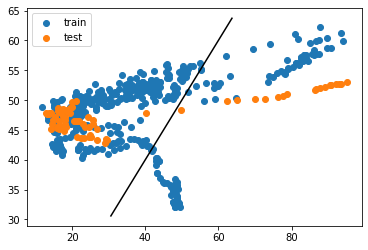

In [38]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend(); plt.show()

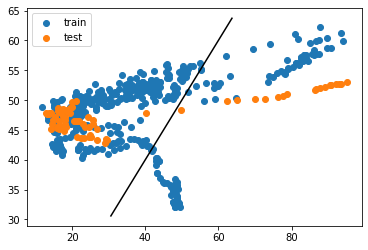

In [39]:
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend(); plt.show()

Epoch 1/25
425/425 [==============================] - 0s 624us/step - loss: 2280.1397
Epoch 2/25
425/425 [==============================] - 0s 79us/step - loss: 2141.6553
Epoch 3/25
425/425 [==============================] - 0s 85us/step - loss: 1941.3104
Epoch 4/25
425/425 [==============================] - 0s 71us/step - loss: 1644.9734
Epoch 5/25
425/425 [==============================] - 0s 81us/step - loss: 1273.1444
Epoch 6/25
425/425 [==============================] - 0s 90us/step - loss: 877.2430
Epoch 7/25
425/425 [==============================] - 0s 77us/step - loss: 622.4482
Epoch 8/25
425/425 [==============================] - 0s 68us/step - loss: 528.8876
Epoch 9/25
425/425 [==============================] - 0s 79us/step - loss: 512.8328
Epoch 10/25
425/425 [==============================] - 0s 78us/step - loss: 495.3742
Epoch 11/25
425/425 [==============================] - 0s 80us/step - loss: 458.9562
Epoch 12/25
425/425 [==============================] - 0s 87us/step 

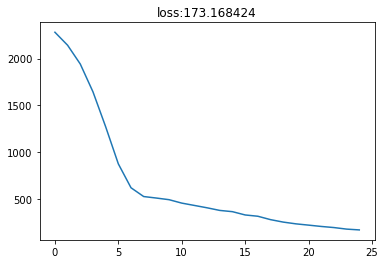

In [40]:
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# fazendo regularização agora
# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [41]:
# fazendo um ensemble (junção de modelos)
# pegamos as previsões de diferentes redes
# e se faz a média de todas resposta (nesse caso de regressão)
# Make predictions from the 3 neural net models

# OBS: não poderia fazer isso com essas variaveis de modelo
# eles já foram treinados com o teste anteriormente para ver desempenho
# teria que RETREINA-LOS

train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[27.206818 27.676712 25.88917  30.337141 32.29013 ]


-2.974445075468979
-60.05492944242023


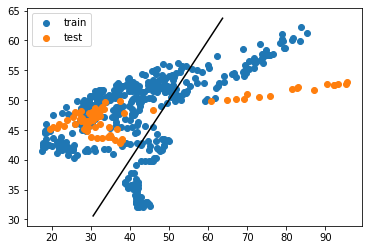

In [42]:
# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend(); plt.show()

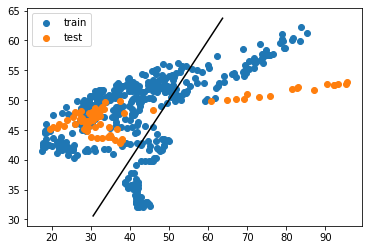

In [43]:
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')
plt.legend(); plt.show()

## Montagem de carteira de ações (portifólio)

Quanto mais diversificar minha carteira com diferentes ações (ativos), menor é o risco relacionado a essa operação de trading.

Volatividade é quanto o valor de um ativo pode variar. 

Ler:

https://blog.magnetis.com.br/volatilidade-em-investimentos/

e blog do Lab de ML da UNB (federal brasilia) de finanças

Consideremos uma série de preços de uma ação em que cada preço de refere a uma observação em um determinado período de tempo:

\begin{align*}
  P = \left\{p_1, p_2, ... , p_n\right\}
\end{align*}

O **retorno efetivo** do ativo no período *t=2* é dado por *R2=p2−p1*. A ideia é que se um agente comprasse o ativo no período 1 ao preço p1 e o vendesse no período 2 ao p2, ele teria o ganho de R2 unidades monetárias. Entretanto, para que essa medida de ganho seja comparável entre ativos diferentes se usa frequentemente o retorno percentual como medida de retorno, isto é:

\begin{align*}
  R_2= \frac{p_2 - p_1}{p_1}\\
\end{align*}

Uma medida mais interessante para o investidor é qual será o retorno do ativo no futuro. Este tipo de retorno é chamado de retorno esperado. Enquanto o retorno efetivo diz respeito ao que ocorreu de fato, o retorno esperado desrespeita ao que ocorrerá no futuro, portanto, uma expectativa. Matematicamente, pode-se definir o retorno esperado como:

\begin{align*}
   \mu = E\left (R\right) =\sum_{i=1}^n p_i R_i
\end{align*}

Em outros termos, o retorno esperado é o somatório dos retornos do ativo ponderado pelo pelas respectivas probabilidades de ocorrência. Assim, para calcular o retorno esperado pela definição deve-se saber todos os retornos que o ativo pode ter e quais as probabilidades associados a eles. Isso significa dizer que se conhece todos os cenários que podem ocorrer, suas probabilidades e retornos associados a eles.

Na maioria dos casos, não se tem este tipo de conhecimento sobre os retornos de determinado ativo. Nesse caso, os retornos históricos podem serem usados para estimar o retorno esperado, mas não há nenhuma garantia de que o retorno futuro será o mesmo que o já observado no passado. Disto isto, neste post o retorno esperado de um ativo será estimado como sendo a média aritmética do retornos históricos. Essa abordagem será adotada em razão da sua simplicidade.

Além da medida de retorno, outra medida de grande importância para os investidores é o **risco** associado aos ativos. Tal métrica mede o quanto em média o valor do retorno efetivo irá divergir do retorno esperado. Isso significa que ativos com risco alto têm retornos efetivos que divergem bastante do retorno esperado, ao mesmo tempo que o ativos menos arriscados têm retornos efetivos que divergem pouco do retorno esperado.

Formalmente, o risco de um ativo é definido como o desvio padrão dos retornos efetivos em relação ao retorno esperado:

\begin{align*}
\sigma = \sqrt{E\left\{\left (R_i - \mu\right)^2\right\}}
\end{align*}

O desvio padrão não é a única medida para avaliar risco. A semi-variância ou downside risk é outro exemplo de medida de risco. Ela formula a ideia de que a variância oriunda de retornos efetivos acima do retorno esperado não deveria ser computado como risco. Pois, quando o retorno efetivo for maior que o retorno esperado isso é um risco “bom”, porém, o risco é em geral associado ao custo de manter determinado ativo. 

In [45]:
# lendo os dados para simular uma carteira de ações
portifDf = pd.read_csv('acoesFechamento3ativos.csv')

In [46]:
portifDf.head()

,data,abev3_sa_close,petr3_sa_close,vale3_sa_close
0,2017-01-02,16.309999,16.530001,25.059999
1,2017-01-03,16.639999,17.580000,26.170000
2,2017-01-04,16.510000,17.370001,25.700001
3,2017-01-05,16.600000,17.760000,26.680000
4,2017-01-06,16.459999,17.490000,25.969999


In [47]:
portifDf.shape

(748, 4)

## Teoria Moderna de Portfólio (TMP)

Essa teoria descreve uma maneira sofisticada de montar uma carteira de ativos levando em conta a volatividade dos papéis, o risco e a combinação entre eles para se obter melhores resultados possíveis.


Eventualmente, obteremos os melhores portifólios de cada mês com base na proporção de Sharpe. O índice de Sharpe é um importante indicador financeiro, ele avalia, além da rentabilidade, o risco de um investimento.

A maneira mais fácil de fazer isso é colocar todos os preços de nossas ações em um dataframe (que foi carregado em *portiDf*) e, em seguida, modificá-los novamente para os períodos diário e mensal. Precisamos de mudanças diárias nos preços para calcular a volatilidade, que usaremos como nossa medida de risco.

In [48]:
# reamostrar todo o DF para o período mensal
# nova amostra para a frequência de início do mês útil BMS (Business Month Start)

# esse código filtrar apenas os primeiros dias do mês mas não funciona aqui
# mensalDf = portifDf.resample('BMS').first()

# fazendo uma cópia do DF portifolio
df = portifDf.copy()

# indexando a coluna data para função resample funcionar
df = df.set_index(pd.DatetimeIndex(df['data']))

In [49]:
df.head()

,data,abev3_sa_close,petr3_sa_close,vale3_sa_close
data,,,,
2017-01-02,2017-01-02,16.309999,16.530001,25.059999
2017-01-03,2017-01-03,16.639999,17.580000,26.170000
2017-01-04,2017-01-04,16.510000,17.370001,25.700001
2017-01-05,2017-01-05,16.600000,17.760000,26.680000
2017-01-06,2017-01-06,16.459999,17.490000,25.969999


In [50]:
# removendo a coluna data com ela está indexada
df = df.drop(['data'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2017-01-02 to 2019-12-30
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   abev3_sa_close  746 non-null    float64
 1   petr3_sa_close  746 non-null    float64
 2   vale3_sa_close  746 non-null    float64
dtypes: float64(3)
memory usage: 23.4 KB


In [52]:
df.head()

,abev3_sa_close,petr3_sa_close,vale3_sa_close
data,,,
2017-01-02,16.309999,16.530001,25.059999
2017-01-03,16.639999,17.580000,26.170000
2017-01-04,16.510000,17.370001,25.700001
2017-01-05,16.600000,17.760000,26.680000
2017-01-06,16.459999,17.490000,25.969999


In [53]:
# filtra apenas os primeiros dias dos meses
# BMS (Business Month Start)
mensalDf = df.resample('BMS').first()

In [54]:
mensalDf.head()

,abev3_sa_close,petr3_sa_close,vale3_sa_close
data,,,
2017-01-02,16.309999,16.530001,25.059999
2017-02-01,17.320000,16.120001,32.889999
2017-03-01,17.910000,16.430000,33.169998
2017-04-03,18.000000,15.320000,29.510000
2017-05-01,18.570000,14.360000,28.059999


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2017-01-02 to 2019-12-30
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   abev3_sa_close  746 non-null    float64
 1   petr3_sa_close  746 non-null    float64
 2   vale3_sa_close  746 non-null    float64
dtypes: float64(3)
memory usage: 23.4 KB


In [56]:
# obtendo a alteração percentual diária e mensal dos ativos
# essas funções retornam quanto ação subiu ou desceu percentual ao dia anterior

# calcula retorno diário das ações
retornoDiaDf = df.pct_change()

# calcula retorno mensal das ações
retornoMesDf = mensalDf.pct_change().dropna()

In [57]:
retornoDiaDf.head()

,abev3_sa_close,petr3_sa_close,vale3_sa_close
data,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,0.020233,0.063521,0.044294
2017-01-04,-0.007812,-0.011945,-0.017959
2017-01-05,0.005451,0.022452,0.038132
2017-01-06,-0.008434,-0.015203,-0.026612


In [58]:
retornoMesDf.head()

,abev3_sa_close,petr3_sa_close,vale3_sa_close
data,,,
2017-02-01,0.061925,-0.024803,0.312450
2017-03-01,0.034065,0.019231,0.008513
2017-04-03,0.005025,-0.067559,-0.110341
2017-05-01,0.031667,-0.062663,-0.049136
2017-06-01,-0.001077,-0.057103,-0.049537


### Cálculo das covariâncias para volatividade

Na TMP, quantificamos o risco via volatilidade. A matemática para calcular a volatilidade do portfólio é complexa e requer covariâncias de retornos diários. Agora, percorreremos todos os meses (*retornoMes*) e calcularemos a covariância dos retornos diários.

Com os índices de data e hora dos pandas, podemos acessar o mês e o ano com *df.index.monthe* e *df.index.year*. Usaremos isso para criar uma máscara, *retornoDia* nos fornece os retornos diários do mês e ano atuais no loop. Em seguida, usar a máscara para o subconjunto da trama de dados como este: *df[mask]*. Isso obtém entradas no *retornoDia* que estão no mês e ano atuais em cada ciclo do loop. Finalmente, usaremos o *.cov( )* método dos pandas para obter a covariância dos retornos diários.

In [59]:
# covariância diária de ações (para cada período mensal)
# criando dicionario que gaurdará matriz de covariancia de cada dia (uma chave)
covariancias = {}
rtd_idx = retornoDiaDf.index

# cria uma máscara para o retornoDia e usa o mês e o ano atual returns_monthlye corresponda a isso ao mês e ano atuais ino loop
for i in retornoMesDf.index:
    # mascarar retornos diarios para cada mes e ano e calcular a covariancia
    mascara = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # usa a mascara para obter retornos diarios para os mes e ano atuais de indice de retornos mensais
    covariancias[i] = retornoDiaDf[mascara].cov()

print(covariancias[i])

                abev3_sa_close  petr3_sa_close  vale3_sa_close
abev3_sa_close        0.000147        0.000013        0.000050
petr3_sa_close        0.000013        0.000246       -0.000004
vale3_sa_close        0.000050       -0.000004        0.000154


In [60]:
# printandos chaves e valores do dicionario de covariancia
for chave, valor in covariancias.items() :
    print(chave, "\n\n", valor, "\n\n")

2017-02-01 00:00:00 

                 abev3_sa_close  petr3_sa_close  vale3_sa_close
abev3_sa_close        0.000165        0.000098       -0.000006
petr3_sa_close        0.000098        0.000353        0.000201
vale3_sa_close       -0.000006        0.000201        0.001583 


2017-03-01 00:00:00 

                 abev3_sa_close  petr3_sa_close  vale3_sa_close
abev3_sa_close        0.000204        0.000142        0.000214
petr3_sa_close        0.000142        0.000666        0.000550
vale3_sa_close        0.000214        0.000550        0.000943 


2017-04-03 00:00:00 

                 abev3_sa_close  petr3_sa_close  vale3_sa_close
abev3_sa_close        0.000094        0.000047        0.000067
petr3_sa_close        0.000047        0.000322        0.000206
vale3_sa_close        0.000067        0.000206        0.000734 


2017-05-01 00:00:00 

                 abev3_sa_close  petr3_sa_close  vale3_sa_close
abev3_sa_close        0.000193        0.000245       -0.000032
petr3_sa_close   

### Calcular portfólios

Agora, geraremos portfólios para encontrar o melhor de cada mês. A função *random.random()* da biblioteca *numpy* gera números aleatórios a partir de uma distribuição uniforme, depois nós os normalizamos para que somem 1 usando o */=* operador. Usamos esses pesos para calcular retornos e volatilidade. Retornos são somas de pesos vezes retornos individuais. A volatilidade é mais complexa e envolve as covariâncias dos diferentes estoques.

Por fim, armazenaremos os valores nos dicionários para uso posterior, com datas de meses como chaves.

Nesse caso, geraremos apenas 10 portfólios para cada data, para que o código seja executado mais rapidamente, mas futuramente pode ser conveniente usar mais de 1000 a 5000 portfólios gerados aleatoriamente para algumas ações.

In [61]:
portfolioRetorno, portfolioVolativ, portfolioPesos = {}, {}, {}

# obtem o desempenho do portfolio de cada mes
for date in sorted(covariancias.keys()):
    # selecionando uma matriz de covariancia
    cov = covariancias[date]
    
    for portfolio in range(10):
        
        # gerando 3 números aleatórios
        pesos = np.random.random(3)
        pesos /= np.sum(pesos) # /= divide os pesos pelo total para somar um
        
        # np.dot calcula o produto escalar
        # multiplica elemento a elemento e resume duas matrizes
        # os pesos vem associados ao retorno mensal da respectiva data
        retorno = np.dot(pesos, retornoMesDf.loc[date])
        
        volatividade = np.sqrt(np.dot(pesos.T, np.dot(cov, pesos)))
        
        # o método .setdefault adiciona uma lista vazia ao portfolio com respectiva data
        portfolioRetorno.setdefault(date, []).append(retorno)
        
        portfolioVolativ.setdefault(date, []).append(volatividade)
        
        portfolioPesos.setdefault(date, []).append(pesos)

print(portfolioPesos[date][0])

[0.42560931 0.17561394 0.39877675]


### Traçar fronteira eficiente

Finalmente, podemos traçar os resultados de nossas carteiras de TMP, que mostram a "fronteira eficiente". Este é um gráfico da volatilidade versus os retornos. Isso pode nos ajudar a visualizar nossas possibilidades de retorno de risco para portfólios. O limite superior esquerdo dos pontos é o melhor que podemos fazer (maior retorno para um determinado risco), e essa é a fronteira eficiente.

Para criar esse gráfico, usaremos a data mais recente em nosso dicionário *covariancia* criado anteriormente. Como as datas são chaves, obteremos as chaves classificadas usando *sorted()* e *.keys()*, em seguida, obteremos a última entrada com a indexação do Python ( *[-1]* ). Por fim, usaremos *matplotlib* para dispersar a variação versus retornos e ver a fronteira eficiente para a data mais recente nos dados.

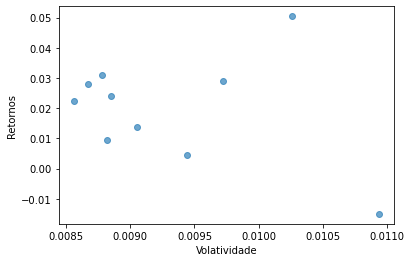

In [62]:
# obtem a data mais recente dos dados disponiveis
date = sorted(covariancias.keys())[-1]  

# plotandos fronteira de eficiencia
plt.scatter(x=portfolioVolativ[date], y=portfolioRetorno[date], alpha=0.65)
plt.xlabel('Volatividade')
plt.ylabel('Retornos')
plt.show()

### Obtendo melhor portfolio a partir do índice Sharpe

Precisamos encontrar os portfólios "ideais" para cada data, para que possamos usá-los como alvos para aprendizado de máquina. Iremos percorrer cada data e *portfolioRetorno*, em seguida, percorrer os portfólios com os quais geramos portfolioRetorno[date]. Em seguida, calcularemos a taxa de Sharpe, que é o retorno dividido pela volatilidade (assumindo um retorno sem risco de 0).

Nós usamos *enumerate()* para percorrer os retornos a data atual (para *portfolioRetorno[date]*) e faixa de manter o índice com i. Em seguida, usamos a data e o índice atuais para obter a volatilidade de cada portfólio *portfolioVolativ[date][i]*. Finalmente, obtemos o índice da melhor proporção de Sharpe para cada data usando np.argmax(). Usaremos esse índice para obter os pesos ideais do portfólio em breve.

In [63]:
# dicionarios vazios para taxas de sharpe e mehlores indices de sharpe
taxaSharpe, max_sharpe_idxs = {}, {}

# laço para repetir as datas e obter uma proporção de sharpe para cada portfolio
for date in portfolioRetorno.keys():
    
    # enumera o portfolioRetorno para cada data
    for i, ret in enumerate(portfolioRetorno[date]):
    
        # divide os retornos pela volatividade da data e do índice i
        taxaSharpe.setdefault(date, []).append(ret / portfolioVolativ[date][i])

    # obtem o indice da melhor proporcao de sharpe para cada data (extrai o máximo)
    max_sharpe_idxs[date] = np.argmax(taxaSharpe[date])

print(portfolioRetorno[date][max_sharpe_idxs[date]])

0.05044550055559387


Acima obtemos a melhor taxa de Sharpe na qual podemos usar para criar os alvos (targets) para aprendizado de máquina.

### Gerando algumas features (variáveis) e targets (alvos)

Agora, trabalharemos para criar alguns recursos (features) para prever nossos portfólios ideais. Simplesmente usaremos o movimento de preços como um recurso por enquanto. Para isso, criaremos uma média móvel ponderada exponencialmente diariamente (EWMA) e, em seguida, reamostraremos para o período mensal. Por fim, mudaremos a média móvel mensal do preço em um mês no futuro, para que possamos usá-lo como um recurso para prever portfólios futuros.


In [64]:
# Calculate exponentially-weighted moving average of daily returns
ewmaDia = retornoDiaDf.ewm(span=30).mean()

# Resample daily returns to first business day of the month with the first day for that month
ewmaMes = ewmaDia.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewmaMes = ewmaMes.shift(1).dropna()

print(ewmaMes.iloc[-1])

abev3_sa_close   -0.004005
petr3_sa_close    0.004677
vale3_sa_close    0.001615
Name: 2019-12-02 00:00:00, dtype: float64


Para usar o aprendizado de máquina para escolher o melhor portfólio, precisamos gerar recursos e destinos. Nossas características foram criadas apenas no último exercício - as médias móveis exponencialmente ponderadas dos preços. Nossas metas serão as melhores carteiras que encontramos a partir da maior proporção de Sharpe.

Usaremos o *.iterrows()* método dos pandas para obter os *index, value* pares para o *ewmaMes* Dataframe. Definiremos o valor atual de *ewmaMes* no loop como nossos recursos. Em seguida, usaremos o índice da melhor proporção de Sharpe (de *max_sharpe_idxs*) para obter o melhor portfolioPesos para cada mês e definir isso como uma meta.

In [65]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewmaMes.iterrows():

    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolioPesos[date][best_idx])
    features.append(ewma)  # add ewma to features

targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

[[0.62562449 0.07580329 0.29857222]
 [0.19156642 0.61240437 0.1960292 ]
 [0.38444074 0.50453033 0.11102892]
 [0.1092661  0.61788278 0.27285113]
 [0.28047172 0.02764344 0.69188484]]


### Visualizando fronteira eficiente com a melhor relação Sharpe

Vamos agora traçar a fronteira eficiente novamente, mas adicione um marcador para o portfólio com o melhor índice Sharpe. Visualizar nossos dados é sempre uma boa idéia para melhor entendê-los.

Lembre-se de que a fronteira eficiente é plotada em um gráfico de dispersão da volatilidade do portfólio no eixo x e os retornos do portfólio no eixo y. Obteremos a data mais recente em que temos nossos dados *covariancias.keys()*, embora qualquer um dos dicionários *portfolioRetorno*, etc., também possa ser usado para obter a data. Então obtemos volatilidades e retornos para a data mais recente que temos do nosso *portfolioVolativ* e *portfolioRetorno*. Finalmente, obtemos o índice do portfólio com o melhor índice de Sharpe *max_sharpe_idxs[date]* e plotamos tudo com *plt.scatter()*.

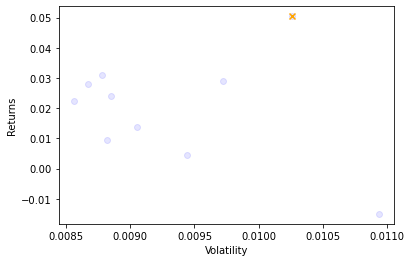

In [66]:
# Get most recent (current) returns and volatility
date = sorted(covariancias.keys())[-1]
cur_returns = portfolioRetorno[date]
cur_volatility = portfolioVolativ[date]

# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.1, color='blue')
best_idx = max_sharpe_idxs[date]

# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## Aprendizado de máquina para TMP

Para ajustar um modelo de aprendizado de máquina para prever portfólios ideais, precisamos criar conjuntos de treinamento e teste para avaliar o desempenho. Faremos como anteriormente, onde pegamos nossas features e targets matrizes e as dividimos com base em um train_size conjunto. Geralmente, o tamanho do trem pode estar entre 70 e 90% dos nossos dados.

Em seguida, ajustamos nosso modelo (uma floresta aleatória neste caso) aos dados de treinamento e avaliamos as pontuações R2 no treinamento e no teste usando *.score()* do nosso modelo. Nesse caso, os hiperparâmetros foram definidos para você, mas geralmente você deseja fazer uma pesquisa com o *ParameterGrid*, como fizemos nos capítulos anteriores.



In [67]:
# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

# Fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.8475410057039976
-0.39299262551040726


c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\jardi\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

### Obter previsões e primeira avaliação
Agora que temos um modelo de floresta aleatória treinado (rfr), queremos usá-lo para obter previsões no conjunto de testes. Fazemos isso para avaliar o desempenho do nosso modelo - em um nível básico, está indo tão bem ou melhor do que apenas comprar um dos ativos?

Usaremos o *.predict(features)* método *sklearn* típico e multiplicaremos nossos retornos mensais pelas previsões de nosso portfólio. Resumimos isso, *np.sum()* pois isso terá três linhas para cada mês. Em seguida, plotamos os retornos mensais de nossas previsões, além de um dos ativos e comparamos os dois.

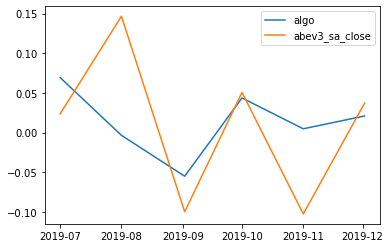

In [73]:
# obter previsões do modelo no treino e teste
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# calcular e plotar retornos de nossas previsões de 
test_returns = np.sum(retornoMesDf.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='algo')
plt.plot(retornoMesDf['abev3_sa_close'].iloc[train_size:], label='abev3_sa_close')
plt.legend()
plt.show()

### Avaliar devoluções

Vamos agora ver como nossa seleção de portfólio funcionaria em comparação com apenas investir no ambev. Faremos isso para ver se nossas previsões são promissoras, apesar do baixo valor de R2.

Definiremos um valor inicial para nosso investimento de R$1.000 e, em seguida, percorreremos os retornos de nossas previsões e também do ambev. Usaremos os retornos mensais de nossa seleção de portfólio e ambev e os aplicaremos ao nosso saldo inicial de caixa. A partir disso, teremos uma imagem mensal de como está o nosso investimento e podemos ver como nossas previsões se saíram em geral em relação ao ambev. Em seguida, podemos traçar nosso portfólio com base em nossas previsões e compará-lo com o ambev.

In [75]:
# Calculate the effect of our portfolio selection on a hypothetical $1k investment
cash = 1000
algo_cash, spy_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    algo_cash.append(cash)

# Calculate performance for SPY
cash = 1000  # reset cash amount
for r in retornoMesDf['abev3_sa_close'].iloc[train_size:]:
    cash *= 1 + r
    spy_cash.append(cash)

print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('ambev returns:', (spy_cash[-1] - spy_cash[0]) / spy_cash[0])

algo returns: 0.07770418249518457
ambev returns: 0.03275856321839046


A previsão do Algo supera a ambev, pois estão acima.

### Retorno da plotagem

Por fim, traçaremos o desempenho de nosso portfólio gerado por aprendizado de máquina, em vez de apenas manter o ambev. Podemos usar isso como uma avaliação para ver se nossas previsões estão indo bem ou não.

Como já temos algo_cash e spy_cash criados, tudo o que precisamos fazer é fornecê-los para plt.plot () para exibição. Também definiremos o rótulo para os conjuntos de dados com a legenda em plt.plot ().

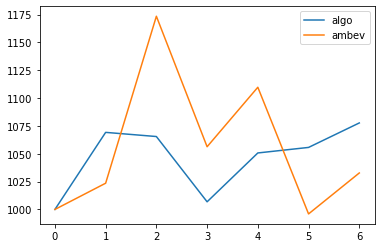

In [77]:
# Plot the algo_cash and spy_cash to compare overall returns
plt.plot(algo_cash, label='algo')
plt.plot(spy_cash, label='ambev')
plt.legend()  # show the legend
plt.show()